# Practica 2

Gerhard Ardon - 202004796
---

### Analisis Con Pandas
Se Debe cargar el contenido de datos.csv a un DataFrame para su limpieza

In [149]:
import pandas as pd

# cargamos el csv
data= pd.read_csv('datos.csv')

# creamos un DataFrame
df = pd.DataFrame(data)
print('DataFrame creado')

DataFrame creado


Con el DataFrame cargado se procede a la limpieza de datos 

In [150]:
# Convertimos todos los valores null a 0
df.fillna(0, inplace=True)

# Comprobamos que rating sea float
df['Rating'] = df['Rating'].astype(float)

# Simplificamos la columna Level
df['Level'] = df['Level'].str.replace('level', '')
df.fillna({"Level": ""}, inplace=True)

# Obtenemos el valor numerico de la columna Duration
df['Duration'] = df['Duration'].str.extract('(\d+)', expand=False)
df.fillna({"Duration": 0}, inplace=True)
df['Duration'] = df['Duration'].astype(int)

# Simplificamos la columna Schedule
df['Schedule'] = df['Schedule'].str.replace('schedule', '')
df.fillna({"Schedule": ""}, inplace=True)

# Obtenemos el valor numerico de la columna Review
df['Review'] = df['Review'].str.extract('(\d+)', expand=False)
df.fillna({'Review': 0}, inplace=True)
df['Review'] = df['Review'].astype(int)

# Eliminamos datos duplicados
df.drop_duplicates(inplace=True)

print('Datos limpiados')
print('Data info-------------')
print(df.info())
print('Duplicados-------------')
print(df.loc[df.duplicated()])


Datos limpiados
Data info-------------
<class 'pandas.core.frame.DataFrame'>
Index: 8695 entries, 0 to 8694
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         8695 non-null   object 
 1   Rating               8695 non-null   float64
 2   Level                8695 non-null   object 
 3   Duration             8695 non-null   int64  
 4   Schedule             8695 non-null   object 
 5   Review               8695 non-null   int64  
 6   What you will learn  8695 non-null   object 
 7   Skill gain           8695 non-null   object 
 8   Modules              8695 non-null   object 
 9   Instructor           8695 non-null   object 
 10  Offered By           8695 non-null   object 
 11  Keyword              8695 non-null   object 
 12  Course Url           8695 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 951.0+ KB
None
Duplicados-------------
Empty DataFrame

Calcular los cursos con mayor y menor rating

In [151]:
# Obtenemos los 20 cursos con mejor rating 
print('Top 20 cursos con mejor rating')
print(df.nlargest(20, 'Rating')[['Rating','Course Title']])
print("")

# Obtenemos los 20 cursos con peor rating
print('Top 20 cursos con peor rating')
print(df.nsmallest(20, 'Rating')[['Rating','Course Title']])


Top 20 cursos con mejor rating
      Rating                                       Course Title
166      5.0                     Songwriting: Writing the Music
356      5.0                        Western Religions & Ecology
362      5.0           El Holocausto: el abismo de la humanidad
364      5.0                    莊子─人情 (Zhuangzi─Between People)
376      5.0         Exploring Beethoven’s Piano Sonatas Part 2
404      5.0                     Desenvolvendo sua musicalidade
436      5.0         Exploring Beethoven's Piano Sonatas Part 5
450      5.0              O Músico Contemporâneo Specialization
451      5.0  Musician’s Professional Toolbox: Your Portfoli...
576      5.0  Certified Business Analysis Professional™ (CBA...
855      5.0      賽局與產業競爭策略 (Game Theory and Business Strategy)
907      5.0            Business Problem Solving Specialization
1007     5.0  Keller Williams Real Estate Agent Professional...
1026     5.0                        Scrum Master Specialization
1158     

Calcular el porcentaje de cursos con horario flexible en relación con el total
de cursos en el conjunto de datos

In [152]:
# Obtenemos el total de cursos
total = df['Schedule'].count()

# Obtenemos todos los Flexible
flexible = df['Schedule'].str.contains('Flexible').sum()

# Obtenemos todas las filas vacias
null = df['Schedule'].str.fullmatch('').sum()

flexible_percent = (flexible/total)*100
flexible_percent = round(flexible_percent, 2)
print('Cursos con horario flexible: ', flexible_percent, '%')

Cursos con horario flexible:  92.63 %


### Analisis Con NLKT

Se debe importar nlkt y cargar el txt a analizar (puede prsentar errores por el idioma)

In [153]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
# Descargar punkt solo la primera vez
#nltk.download('punkt')


# Cargar el txt
with open('Coursera Comments.txt', 'r') as file:
    data = file.read()

print('Caracteres cargados:',len(data))


Caracteres cargados: 1147900


Tokenizacion

In [156]:
tokens = word_tokenize(data)
print('Tokens:', len(tokens))
print(tokens[:1000])

Tokens: 204874
['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', 'con', '5', 'estrellas', 'sobre', '5', '21', 'ago', '2024', 'Escandalizada', 'y', 'confundida', 'por', 'las…', 'Escandalizada', 'y', 'confundida', 'por', 'las', 'malas', 'reseñas', '.', 'Estoy', 'en', 'coursera', 'desde', 'el', 'mes', 'de', 'julio', '2024', 'y', 'estoy', 'haciendo', 'actualmente', 'el', 'curso', 'de', 'front-end', 'developer', 'que', 'imparte', 'Meta', '.', 'Para', 'entrar', 'a', 'este', 'curso', 'tenías', 'que', 'pagar', 'Coursera', 'Plus', ',', 'donde', 'tienes', 'acceso', 'a', 'todos', 'los', 'cursos', 'por', '45', 'euros', 'mensuales', '.', 'Duré', 'en', 'un', 'periodo', 'de', 'prueba', 'gratis', 'de', '7', 'días', 'y', 'al', '8vo', 'me', 'hicieron', 'el', 'cargo', '.', 'Ya', 'llevo', 'casi', 'dos', 'meses', 'haciendo', 'el', 'curso', 'y', 'no', 'me', 'ha', 'dado', 'ningún', 'tipo', 'de', 'problemas', ',', 'todo', 'está', 'súper', 'completo', 'y', 'no', 'tengo', 'mayor', 'problemas', 'p

Lematización y Stemming (llevar las palabaras a su forma "raiz")

In [174]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemmas = [lemmatizer.lemmatize(token, pos= 'n') for token in tokens]
print("Lemas:", lemmas[:1000])

stemmer = nltk.PorterStemmer()
stems = [stemmer.stem(token) for token in tokens]
print("Stems:", stems[:1000])

Lemas: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', 'con', '5', 'estrellas', 'sobre', '5', '21', 'ago', '2024', 'Escandalizada', 'y', 'confundida', 'por', 'las…', 'Escandalizada', 'y', 'confundida', 'por', 'la', 'malas', 'reseñas', '.', 'Estoy', 'en', 'coursera', 'desde', 'el', 'me', 'de', 'julio', '2024', 'y', 'estoy', 'haciendo', 'actualmente', 'el', 'curso', 'de', 'front-end', 'developer', 'que', 'imparte', 'Meta', '.', 'Para', 'entrar', 'a', 'este', 'curso', 'tenías', 'que', 'pagar', 'Coursera', 'Plus', ',', 'donde', 'tienes', 'acceso', 'a', 'todos', 'los', 'cursos', 'por', '45', 'euro', 'mensuales', '.', 'Duré', 'en', 'un', 'periodo', 'de', 'prueba', 'gratis', 'de', '7', 'días', 'y', 'al', '8vo', 'me', 'hicieron', 'el', 'cargo', '.', 'Ya', 'llevo', 'casi', 'do', 'me', 'haciendo', 'el', 'curso', 'y', 'no', 'me', 'ha', 'dado', 'ningún', 'tipo', 'de', 'problemas', ',', 'todo', 'está', 'súper', 'completo', 'y', 'no', 'tengo', 'mayor', 'problemas', 'para', 'abrir', 

Eliminación de palabras vacias

In [176]:
# Eliminamos las palabras vacias

from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print('tokens filtrados:', filtered_tokens[:1000])

tokens filtrados: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', '5', 'estrellas', '5', '21', 'ago', '2024', 'Escandalizada', 'confundida', 'las…', 'Escandalizada', 'confundida', 'malas', 'reseñas', '.', 'coursera', 'mes', 'julio', '2024', 'haciendo', 'actualmente', 'curso', 'front-end', 'developer', 'imparte', 'Meta', '.', 'entrar', 'curso', 'pagar', 'Coursera', 'Plus', ',', 'acceso', 'cursos', '45', 'euros', 'mensuales', '.', 'Duré', 'periodo', 'prueba', 'gratis', '7', 'días', '8vo', 'hicieron', 'cargo', '.', 'llevo', 'casi', 'dos', 'meses', 'haciendo', 'curso', 'dado', 'ningún', 'tipo', 'problemas', ',', 'súper', 'completo', 'mayor', 'problemas', 'abrir', 'cada', 'modulo', '.', 'Quizás', 'unica', 'pega', 'asesores', 'personales', ',', 'foros', 'discusión', 'bastante', 'receptivos', 'alumnos', 'ayudan', '.', 'creo', 'gente', 'malas', 'experiencias', 'saben', 'leer', 'detenimiento', '``', 'letras', 'pequeñas', "''", 'cursos', 'gratis', '.', 'luego', 'pagos', '.', 'ca

Frecuencia de palabras

In [179]:
# recuento de palabras
from collections import  Counter
word_count = Counter(filtered_tokens)

print('Recuento de palabras')
for word in word_count.most_common(1000):
    print(word)


Recuento de palabras
(',', 6799)
('.', 6702)
('curso', 1297)
(':', 887)
('“', 869)
('”', 869)
('Semana', 843)
('-', 839)
('TA', 833)
('participantes', 822)
('semana', 780)
('dudas', 744)
('portafolio', 731)
('1', 569)
('si', 551)
(')', 548)
('foros', 510)
('compañeros', 489)
('(', 481)
('actividades', 440)
('trabajo', 438)
('2', 425)
('evaluación', 416)
('plataforma', 394)
('portafolios', 392)
('hacer', 388)
('uso', 380)
('recursos', 379)
('aprendizaje', 370)
('pares', 370)
('?', 363)
("''", 352)
('4', 346)
('3', 343)
('tiempo', 343)
('entrega', 332)
('ser', 308)
('abierto', 306)
('``', 305)
('trabajos', 296)
('actividad', 294)
('conocimiento', 282)
('información', 274)
('educativo', 271)
('bien', 259)
('abiertos', 256)
('Movimiento', 255)
('–', 255)
('cada', 252)
('educativos', 246)
('sido', 245)
('prácticas', 239)
('parte', 238)
('realizar', 230)
('ver', 229)
('mas', 226)
('!', 225)
('subir', 225)
('grupo', 224)
('comentarios', 223)
('forma', 221)
('participación', 214)
('problemas',

Analisis de sentimiento

In [187]:
# Analisis de sentimientos
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

import re
with open('Coursera Comments.txt', 'r') as file:
    reviews = file.read()

# Patrón para encontrar cada comentario
pattern = r"Valorada con \d estrellas sobre 5\n(.*?)\nFecha de la experiencia"

# Usamos re.findall para extraer todas las coincidencias del patrón
comentarios = re.findall(pattern, reviews, re.DOTALL)

for i, comentario in enumerate(comentarios, 1):
    print(comentario)
    feeling = analyzer.polarity_scores(comentario)
    print(feeling)
    if feeling['compound'] < 0:
        print('comment negativo :(')
    elif feeling['compound'] > 0:
        print('comment positivo :)')
    else:
        print('comment neutral :|')
    print('-------------')

21 ago 2024
Escandalizada y confundida por las…
Escandalizada y confundida por las malas reseñas.
Estoy en coursera desde el mes de julio 2024 y estoy haciendo actualmente el curso de front-end developer que imparte Meta.
Para entrar a este curso tenías que pagar Coursera Plus, donde tienes acceso a todos los cursos por 45 euros mensuales. Duré en un periodo de prueba gratis de 7 días y al 8vo me hicieron el cargo. Ya llevo casi dos meses haciendo el curso y no me ha dado ningún tipo de problemas, todo está súper completo y no tengo mayor problemas para abrir cada modulo. Quizás la unica pega es que no hay asesores personales, pero los foros de discusión son bastante receptivos y los alumnos se ayudan entre sí. Yo creo que la gente que ha tenido malas experiencias porque no saben leer
con detenimiento las "letras pequeñas" sobre los cursos gratis. que luego son pagos. En mi caso leí con detenimiento toda la información y transparencia sí que hay sobre el tema de pagos. En fin... Yo sí 

Reconocimiento de entidades nombradas y extraccion de entidades


In [196]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

# Tokenizamos las oraciones
sentences = sent_tokenize(data)

# Se etiquetan las palabras (1000 sentences por tiempo de carga)
tagged = [nltk.pos_tag(word_tokenize(sentence)) for sentence in sentences[:1000]]

# Se reconocen las entidades 
entities = [nltk.ne_chunk(tag) for tag in tagged]

for entity in entities[:10]:
    print(entity)


(S
  (PERSON Abril/NNP)
  (PERSON Vargas/NNP Pérez/NNP)
  3/CD
  opiniones/NNS
  (ORGANIZATION PT/NNP Valorada/NNP)
  con/VBD
  5/CD
  estrellas/NNS
  sobre/VBD
  5/CD
  21/CD
  ago/RB
  2024/CD
  Escandalizada/NNP
  y/CC
  confundida/JJ
  por/NN
  las…/NN
  (PERSON Escandalizada/NNP)
  y/NNP
  confundida/NN
  por/NN
  las/VBZ
  malas/NNS
  reseñas/NN
  ./.)
(S
  (GPE Estoy/NNP)
  en/CC
  coursera/NN
  desde/NN
  el/JJ
  mes/NNS
  de/IN
  julio/NN
  2024/CD
  y/NN
  estoy/CC
  haciendo/NN
  actualmente/NN
  el/FW
  curso/NN
  de/IN
  front-end/JJ
  developer/NN
  que/NN
  imparte/NN
  (ORGANIZATION Meta/NNP)
  ./.)
(S
  (GPE Para/NNP)
  entrar/VBZ
  a/DT
  este/NN
  curso/NN
  tenías/NN
  que/NN
  pagar/NN
  (PERSON Coursera/NNP Plus/NNP)
  ,/,
  donde/NN
  tienes/NNS
  acceso/VBP
  a/DT
  todos/JJ
  los/NN
  cursos/NN
  por/NN
  45/CD
  euros/NN
  mensuales/NNS
  ./.)
(S
  (GPE Duré/NNP)
  en/CC
  un/JJ
  periodo/NN
  de/IN
  prueba/FW
  gratis/NN
  de/IN
  7/CD
  días/NNS
  y/RB
  al

### Graficos Solicitados

Se graficaran los siguientes puntos utilizando la libreria Matplotlib

In [199]:
import matplotlib.pyplot as plt

Se requiere generar una gráfica de barras que muestre el número de
cursos en cada nivel de dificultad.

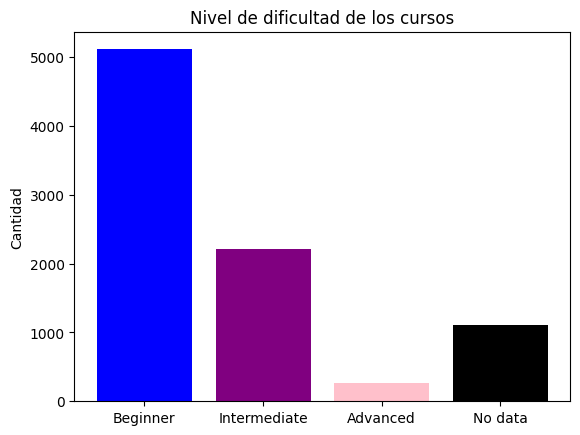

In [224]:
# Se debe recoradr que la información de los cursos se encuentra en el DataFrame df
# Filtramos por su nivel de dificultad
total = df['Level'].count()
beginer =df['Level'].str.contains('Beginner').sum()
intermediate =df['Level'].str.contains('Intermediate').sum()
advanced =df['Level'].str.contains('Advanced').sum()
null = df['Level'].str.fullmatch('').sum()

# Creamos la grafica de barras
fig, ax = plt.subplots()
ax.bar(['Beginner','Intermediate','Advanced','No data'],[beginer,intermediate,advanced,null], color=['blue','purple','pink','black'])
ax.set_ylabel('Cantidad')
ax.set_title('Nivel de dificultad de los cursos')
plt.show()


Se solicita la generación de una gráfica de barras horizontal que muestre
el número de cursos en las principales categorías